In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import math
from sklearn.neighbors import KNeighborsClassifier

In [2]:
ls

lab_clean_categorical_data.ipynb
we_fn_use_c_marketing_customer_value_analysis.csv*


In [3]:
df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
#lower columns name.
cols = []
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower())
df.columns = cols

df.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
#Add undescore in the column names
df.columns = df.columns.str.replace(' ' , '_')
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
# Date format: Effective To Date
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'] , errors='coerce') #Change the format to yyyy-mm-dd hh:mm:ss
display(df.head())
print(df.dtypes)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [24]:
numericals = df.select_dtypes(include = np.number)
y = df['total_claim_amount']
X = df.drop(['total_claim_amount'], axis = 1)

In [25]:
y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: total_claim_amount, Length: 9134, dtype: float64

In [9]:
categorical_df = df.select_dtypes(include = ['object','datetime64'])
categorical_df.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [11]:
categorical_df.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
effective_to_date    0
employmentstatus     0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [13]:
# Separate de index column
index_categorical = categorical_df['customer']
categorical_df = categorical_df.drop(['customer'], axis = 1)

In [38]:
display(categorical_df['state'].unique())
display(categorical_df['response'].unique())
display(categorical_df['coverage'].unique())
display(categorical_df['education'].unique())
display(categorical_df['effective_to_date'].unique())
display(categorical_df['employmentstatus'].unique())
display(categorical_df['gender'].unique())
display(categorical_df['location_code'].unique())
display(categorical_df['marital_status'].unique())
display(categorical_df['policy_type'].unique())
display(categorical_df['policy'].unique())
display(categorical_df['renew_offer_type'].unique())
display(categorical_df['sales_channel'].unique())
display(categorical_df['vehicle_class'].unique())
display(categorical_df['vehicle_size'].unique())


array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

array(['No', 'Yes'], dtype=object)

array(['Basic', 'Extended', 'Premium'], dtype=object)

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

array(['2011-02-24T00:00:00.000000000', '2011-01-31T00:00:00.000000000',
       '2011-02-19T00:00:00.000000000', '2011-01-20T00:00:00.000000000',
       '2011-02-03T00:00:00.000000000', '2011-01-25T00:00:00.000000000',
       '2011-01-18T00:00:00.000000000', '2011-01-26T00:00:00.000000000',
       '2011-02-17T00:00:00.000000000', '2011-02-21T00:00:00.000000000',
       '2011-01-06T00:00:00.000000000', '2011-02-06T00:00:00.000000000',
       '2011-01-10T00:00:00.000000000', '2011-01-17T00:00:00.000000000',
       '2011-01-05T00:00:00.000000000', '2011-02-27T00:00:00.000000000',
       '2011-01-14T00:00:00.000000000', '2011-01-21T00:00:00.000000000',
       '2011-02-05T00:00:00.000000000', '2011-01-29T00:00:00.000000000',
       '2011-02-28T00:00:00.000000000', '2011-02-12T00:00:00.000000000',
       '2011-02-02T00:00:00.000000000', '2011-02-07T00:00:00.000000000',
       '2011-01-22T00:00:00.000000000', '2011-02-13T00:00:00.000000000',
       '2011-01-15T00:00:00.000000000', '2011-01-08

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

array(['F', 'M'], dtype=object)

array(['Suburban', 'Rural', 'Urban'], dtype=object)

array(['Married', 'Single', 'Divorced'], dtype=object)

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

array(['Medsize', 'Small', 'Large'], dtype=object)

In [45]:
display(categorical_df['sales_channel'].value_counts())

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [19]:
# I think the datetime is not a categorical data.
print(categorical_df.dtypes)

state                        object
response                     object
coverage                     object
education                    object
effective_to_date    datetime64[ns]
employmentstatus             object
gender                       object
location_code                object
marital_status               object
policy_type                  object
policy                       object
renew_offer_type             object
sales_channel                object
vehicle_class                object
vehicle_size                 object
dtype: object


In [20]:
# alpha numeric
display(categorical_df['renew_offer_type'].unique())

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

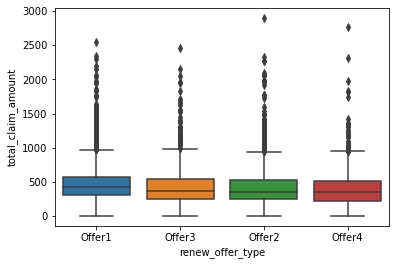

In [27]:
sns.boxplot(x="renew_offer_type", y="total_claim_amount", data=df)
plt.show()

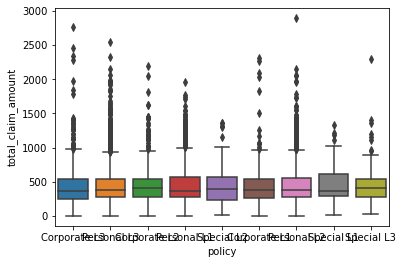

In [31]:
# Another alpha and numeric value
sns.boxplot(x="policy", y="total_claim_amount", data=df)
plt.show()

The policy_type and policy data have the same amount. The difference between them is how chassified the data. In policy columns have more detail than the policy type column. So, I think that the most important columns is 'policy' because have more detail that give the business relevant information.

In [36]:
display(categorical_df['policy_type'].value_counts())

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [29]:
display(categorical_df['policy'].value_counts())

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

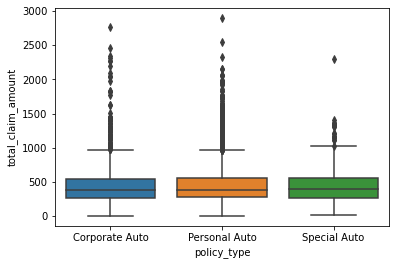

In [37]:
# Another alpha and numeric value
sns.boxplot(x="policy_type", y="total_claim_amount", data=df)
plt.show()

In [46]:
def plot_categorical(categorical_df):
    for col in categorical_df.columns:
        sns.countplot(x=col, data=categorical_df)
        plt.show()

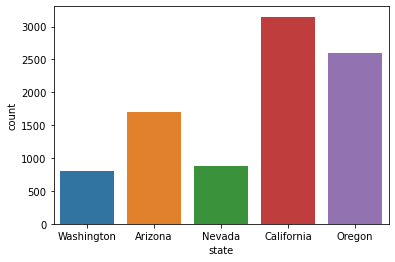

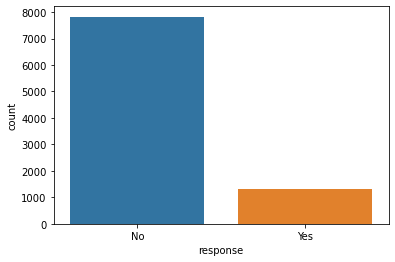

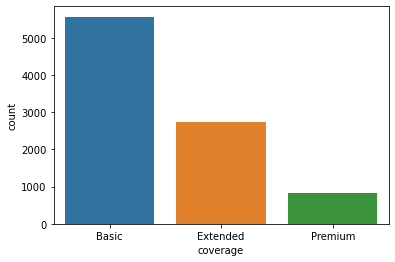

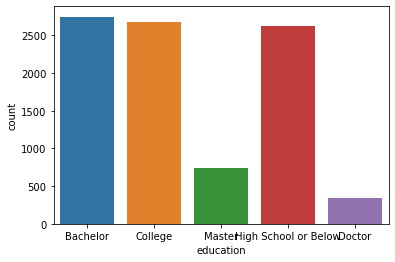

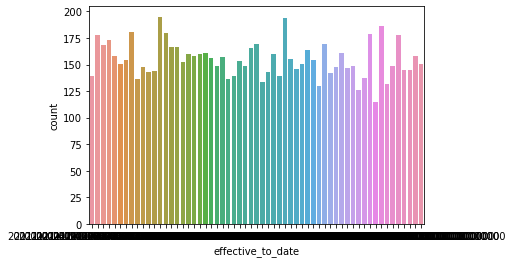

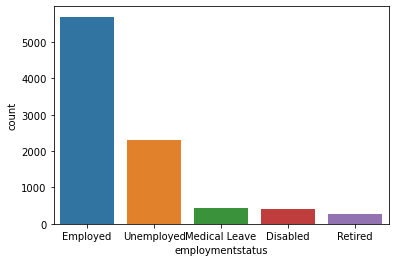

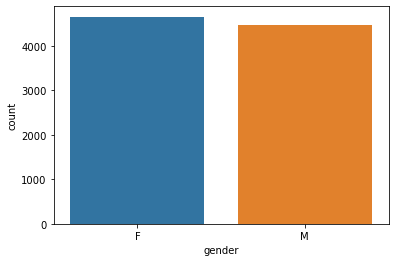

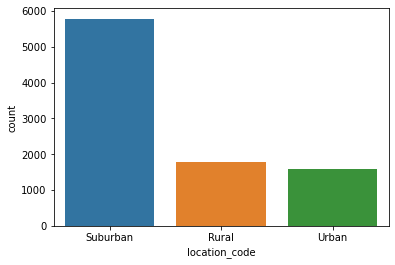

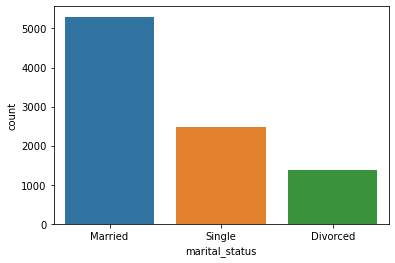

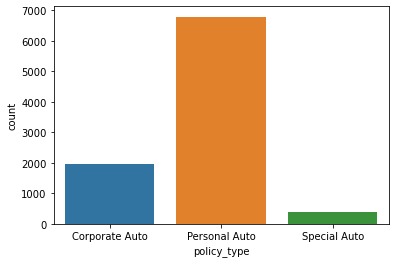

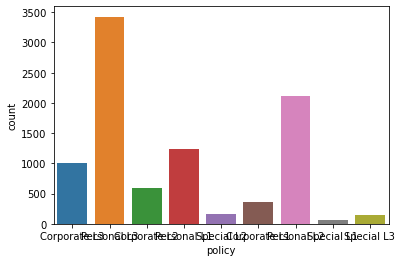

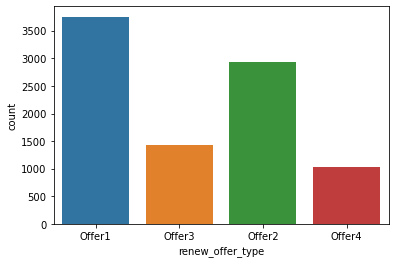

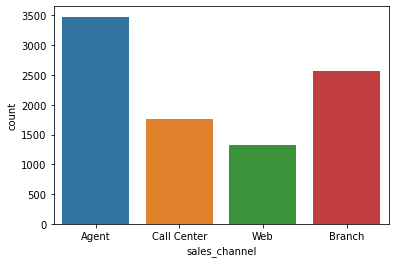

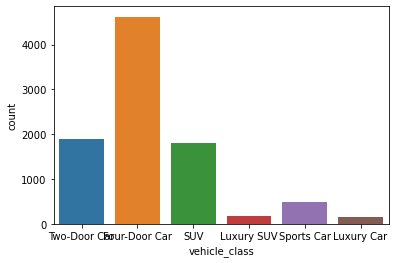

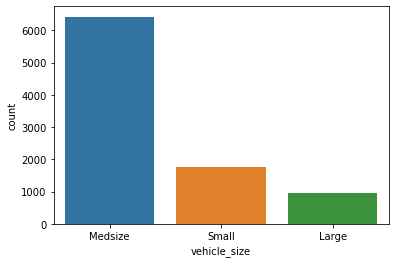

In [47]:
plot_categorical(categorical_df)

In [40]:
display(categorical_df['coverage'].value_counts())

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [28]:
count_offer = categorical_df['renew_offer_type'].value_counts()
count_offer

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64